In [1]:
import splat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from astropy.visualization import ZScaleInterval
import matplotlib
import wisps
import wisps.simulations as wispsim
import seaborn as sns
import matplotlib.colors as mcolors

from astropy.coordinates import SkyCoord
import astropy.coordinates as astrocoord
import astropy.units as u

import matplotlib as mpl
mpl.rcParams['font.size'] = 18
%matplotlib inline

Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database












In [2]:
#MIX MY COLORMAP WITH COOOLWARM 
colors1 = plt.cm.coolwarm(np.linspace(0., 1, 256))
colors2=plt.cm.YlOrBr(np.linspace(0., 1, 256))
colors = np.vstack((colors1+colors1)/2)
mymap=mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [3]:
mymap_r=mymap.reversed(name='revers')

In [4]:
print ('helo')

helo


In [5]:
def get_indices(x):
    if x is None :
        return pd.Series({})
    else:
        return  pd.Series(x.indices)
    
def get_spt(x):
    if x is None:
        return np.nan
    else:
        return x.spectral_type[0]

def reclassify(s):
    if s is None:
        return None
    #spt_unc=s.spectral_type[1
    #rngs=[[1.17,1.35],[1.45,1.67]]
    rngs=[1.17, 1.67]
    #spt,spt_e = splat.classifyByStandard(s.splat_spectrum,fit_ranges=rngs, average=True)
    #s.classify_by_standard(comprange=rngs)
    #print(wisps.make_spt_number(spt))
    spt, spt_e=wisps.classify_by_templates(s, comprange=rngs)
    s.spectral_type=(np.round(wisps.make_spt_number(spt)), spt_e)
    s.calculate_distance(use_spt_unc=True, use_index_type=False)
    
    return s
    


In [6]:
#jklj

In [7]:
rngo=np.array([[1.2,1.35],[1.45,1.65]])
rng1=np.array([1.2, 1.6])


In [8]:
len(np.shape(rngo))

2

In [9]:
#read in the data
cands0=pd.read_hdf(wisps.LIBRARIES+'/objects_of_interest.h5', key='all')

In [10]:
spectra= [reclassify(x) for x in cands0.spectra]

In [11]:
cands0['spectra']=spectra

In [12]:
cands=cands0.spectra.apply(get_indices)
cands['spectra']=cands0.spectra

In [13]:
cands['grism_id']=cands0.grism_id
cands['spt']=cands0.spectra.apply(get_spt)

In [14]:
canddf=cands[~cands.spectra.isna()].reset_index(drop=True)

In [15]:
canddf['spt']=canddf.spectra.apply(lambda x: x.spectral_type[0])
canddf['spt_er']=canddf.spectra.apply(lambda x: x.spectral_type[1])
canddf['distance']=canddf.spectra.apply(lambda x: x.distance['val'].value)
canddf['distance_er']=canddf.spectra.apply(lambda x: x.distance['er'].value)
canddf['coord']=canddf.spectra.apply(lambda x:x.coords)
canddf['designation']=canddf.spectra.apply(lambda x: x.designation)
#canddf['index_type_er']=canddf.spectra.apply(lambda x: x.index_type[1])

In [16]:
canddfj=canddf.join(canddf.spectra.apply(lambda x: pd.Series(x.mags)))
canddff=canddfj.join(canddf.spectra.apply(lambda x: pd.Series(x.snr)))
canddff['spectra']=canddf.spectra

canddff=canddff.drop_duplicates('designation')

In [17]:
#noisy and re-checked objects
exclude=['J01253527-0001383', 'J20220361-3113264', 
         'J05300520-0723374', 'J05315184-0723016',
         'J14313999+2447186', 'J15343866+5014150']

In [18]:
#canddff.designation.str.upper()

In [19]:
#canddff[canddff.designation.str.upper().isin(exclude)]

In [20]:
ucds=wisps.Annotator.reformat_table((canddff[(canddff.spt>=17) & \
                                             (~(canddff.designation.str.upper().isin(exclude))) \
&(canddff.snr1 >=3.)]).reset_index(drop=True)).sort_values(by='spt')

In [21]:

#%prun 

In [22]:
#ghj

In [23]:
#remove some objects by name
ucds=(ucds[~ ucds.grism_id.isin(['par199-00124'])]).reset_index(drop=True).sort_values(by='spt')

Text(0, 0.5, 'SPT ER')

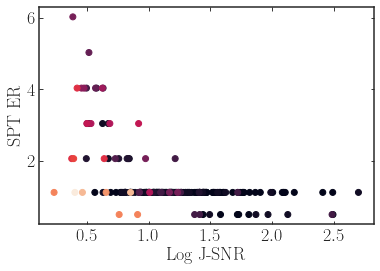

In [24]:
fig, ax=plt.subplots()
plt.scatter(ucds.snr4.apply(np.log10), ucds.spt_er,  c=ucds.spt)
plt.xlabel('Log J-SNR')
plt.ylabel('SPT ER')

In [25]:
ucds[ucds.spt_er>5][['snr1', 'F110W', 'F140W', 'F160W', 'designation', 'spt_er', 'spt']]

,snr1,F110W,F140W,F160W,designation,spt_er,spt
206,4.580164,NaN,24.401167,24.742002,J10001529+0221196,5.024938,23.0
210,4.476141,NaN,24.511110,24.955962,J10004273+0220589,6.020797,24.0


In [40]:
len(ucds[ucds.spt.between(17, 19)]), len(ucds[ucds.spt.between(20, 29)]), len(ucds[ucds.spt.between(30, 40)])

(190, 30, 11)

In [100]:
tdwarfs.iloc[tdwarfs.distance.argmax()][['distance', 'distance_er']]

distance                                        906.241
distance_er    [220.19011970661097, 226.85191343871008]
Name: 223, dtype: object

In [27]:
OBSERVED_POINTINGS =pd.read_pickle(wisps.OUTPUT_FILES+'/pointings.pkl')


In [28]:
mdwarfs=(ucds.sort_values('spt')[ucds.spt.between(17, 20)])
ldwarfs=(ucds.sort_values('spt')[ucds.spt.between(20, 30)])
tdwarfs=(ucds.sort_values('spt')[ucds.spt.between(30, 40)])

coords=SkyCoord(ucds.coord.values)

galoc=coords.transform_to(astrocoord.Galactocentric(galcen_distance=8.3*u.kpc))
x, y, z=galoc.cartesian.xyz

r=(x**2+y**2)**0.5

ucds['pointing']=ucds.grism_id.apply(wispsim.get_proper_pointing)
pntcoords=SkyCoord([x.coord for x in OBSERVED_POINTINGS 
                    if not (x.name.lower() in ucds.pointing.str.lower().values)])

In [29]:
#plt.style.use('dark_background')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


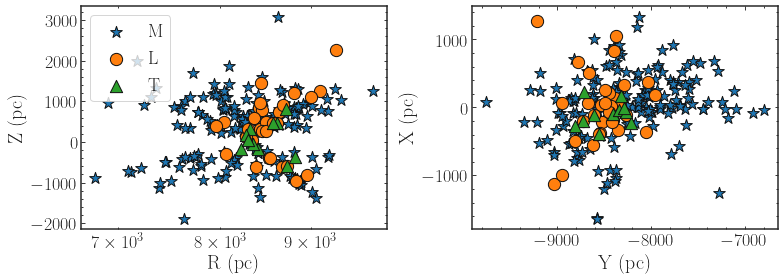

In [30]:
fig, (ax, ax1)=plt.subplots(figsize=(11, 4), ncols=2)

sc=ax.scatter(r[mdwarfs.index], z[mdwarfs.index], s=150, cmap='coolwarm',  marker='*', edgecolors='#111111', label='M')
sc=ax.scatter(r[ldwarfs.index], z[ldwarfs.index], s=150, cmap='coolwarm',  marker='o', edgecolors='#111111', label='L')
sc=ax.scatter(r[tdwarfs.index], z[tdwarfs.index], s=150, cmap='coolwarm',  marker='^', edgecolors='#111111', label='T')

ax.minorticks_on()

sc=ax1.scatter(x[mdwarfs.index], y[mdwarfs.index], s=150, cmap='coolwarm',  marker='*', edgecolors='#111111')
sc=ax1.scatter(x[ldwarfs.index], y[ldwarfs.index], s=150, cmap='coolwarm',  marker='o', edgecolors='#111111')
sc=ax1.scatter(x[tdwarfs.index], y[tdwarfs.index], s=150, cmap='coolwarm',  marker='^', edgecolors='#111111')

ax.minorticks_on()



ax.set_ylabel('Z (pc)', fontsize=20)
ax.set_xlabel('R (pc)', fontsize=20)
ax1.set_ylabel('X (pc)', fontsize=20)
ax1.set_xlabel('Y (pc)', fontsize=20)

ax.minorticks_on()
ax1.minorticks_on()


#add the sun
#Rsun=83000.
#Zsun=27.

#ax1.scatter(0., 0.)
#ax.scatter(8300, 27., marker='')
ax.legend()
#plt.grid(color='#7FDBFF')
#mplcyberpunk.make_lines_glow(ax)
#mplcyberpunk.make_lines_glow(ax1)
ax.set_xscale('log')


plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/candidate_distances.pdf', bbox_inches='tight')

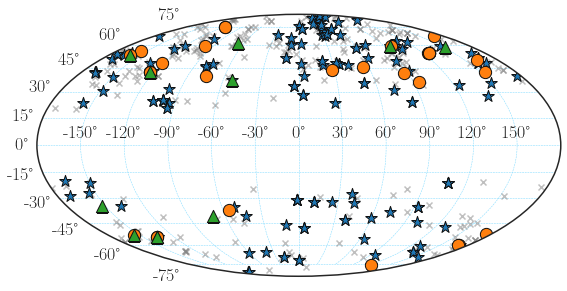

In [31]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='mollweide')

ax.scatter(pntcoords.galactic.l.wrap_at(180*u.deg).radian, pntcoords.galactic.b.wrap_at(180*u.deg).radian, c='grey', marker='x', alpha=0.5)

c=ax.scatter(galoc.galactic.l.wrap_at(180*u.deg).radian[mdwarfs.index], galoc.galactic.b.wrap_at(180*u.deg).radian[mdwarfs.index], 
             marker='*', edgecolors='#111111', s=150)
c=ax.scatter(galoc.galactic.l.wrap_at(180*u.deg).radian[ldwarfs.index], galoc.galactic.b.wrap_at(180*u.deg).radian[ldwarfs.index], 
             marker='o', edgecolors='#111111', s=150)
c=ax.scatter(galoc.galactic.l.wrap_at(180*u.deg).radian[tdwarfs.index], galoc.galactic.b.wrap_at(180*u.deg).radian[tdwarfs.index], 
             marker='^', edgecolors='#111111', s=150)




             

#plt.xlabel("l", fontsize=18)
#plt.ylabel("b", fontsize=18)
plt.grid(color='#7FDBFF')
plt.minorticks_on()
#mplcyberpunk.make_lines_glow(ax)

plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/candidate_skymap.pdf', bbox_inches='tight')

In [32]:
#4*533*0.1

In [33]:
bucds=abs(galoc.galactic.b.wrap_at(180*u.deg).to(u.deg).value)
bpnts=abs(pntcoords.galactic.l.wrap_at(180*u.deg).to(u.deg).value)

areanorth= len(bpnts[np.logical_and(bpnts >0, bpnts <= 30.) ])*4.1*(u.arcmin**2)
areamid= len(bpnts[np.logical_and(bpnts >30, bpnts <= 60.) ])*4.1*(u.arcmin**2)
areasouth= len(bpnts[np.logical_and(bpnts >30, bpnts <= 90.) ])*4.1*(u.arcmin**2)

print ('ucds density in north {}'.format(len(bucds[np.logical_and(bucds >0, bucds <= 30.) ])/areanorth))
print ('ucds density in middle {}'.format(len(bucds[np.logical_and(bucds >30, bucds <=60) ])/areamid))
print ('ucds density in south {}'.format(len(bucds[np.logical_and(bucds >60, bucds <=90) ])/areasouth))

ucds density in north 0.22648083623693382 1 / arcmin2
ucds density in middle 1.5345528455284554 1 / arcmin2
ucds density in south 0.21951219512195125 1 / arcmin2


In [68]:
#np.array(list(mdwarfs.index))

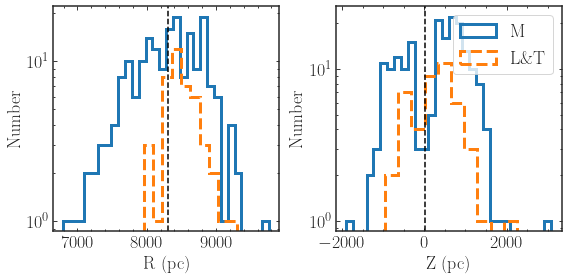

In [104]:
fig, (ax, ax1)=plt.subplots(ncols=2, figsize=(8, 4))

h=ax.hist(r.value[mdwarfs.index], bins=30, histtype='step', linewidth=3, log=True)
h=ax1.hist(z.value[mdwarfs.index], bins=30, histtype='step', linewidth=3, log=True, label='M')

h=ax.hist(r.value[np.concatenate([list(ldwarfs.index), list(tdwarfs.index)])],\
                                 histtype='step', linewidth=3, linestyle='--', log=True)
h=ax1.hist(z.value[np.concatenate([list(ldwarfs.index), list(tdwarfs.index)])],\
           histtype='step', linewidth=3, linestyle='--', log=True, label='L\&T')

#h=ax.hist(r.value[tdwarfs.index], histtype='step', linewidth=3, linestyle=':', log=True)
#h=ax1.hist(z.value[tdwarfs.index],  histtype='step', linewidth=3, linestyle=':', log=True)

ax.axvline(8300, c='k', linestyle='--')
ax1.axvline(27, c='k', linestyle='--')
#ax1.text(27, 1, s=r'\u2609')

ax.set_xlabel('R (pc)')
ax1.set_xlabel('Z (pc)')
for a in [ax, ax1]:
    a.minorticks_on()
    a.set_ylabel('Number')
plt.tight_layout()
ax1.legend()
plt.savefig(wisps.OUTPUT_FIGURES+'/rz_distribution.pdf',  bbox_inches='tight',  facecolor='white', transparent=False)

In [115]:
#favorite T dwarf
fav_t=tdwarfs.iloc[-3].spectra

In [117]:
import glob
fav_t.photo_image.path

'/volumes/burgasserlab/Surveys//goods*/goodss-01/goodss-01*F160*drz_sci.fits'

In [35]:
len(z[abs(z.value) > 1000.]), len(z[abs(z.value) <= 1000.])

(45, 186)

In [36]:
fghjnk

NameError: name 'fghjnk' is not defined

In [ ]:
fdf=ucds.sort_values(by='spt')[['grism_id', 'distance', 'spt','spectra']]

In [ ]:
def formatted_distance(x):
    d= str(int(round(x.distance['val'].value, 0)))
    der=[str(int(abs(round(x.distance['er'].value[0], 0)))),\
            str(int(abs(round(x.distance['er'].value[0], 0))))]
         
    if abs(x.distance['er'].value[0])/x.distance['val'].value >0.9:
        return "$\\approx$"+d
    else:
        #return r'$'+d+'\substack{+'+der[0]+'\\\ -'+der[-1]+'}$'
        return d+'$^{+'+der[0]+'}'+'_{-'+der[1]+'}$'

In [ ]:
formatted_distance(fdf.spectra.iloc[0])

In [ ]:
latc_df=pd.DataFrame()

In [ ]:
latc_df['Shortname']=fdf.spectra.apply(lambda x: x.shortname.upper())
latc_df['designation']=fdf.spectra.apply(lambda x: x.designation.upper())
latc_df['grism id']=fdf.spectra.apply(lambda x: x.name.upper().replace('_', '-'))
latc_df['snrj']=fdf.spectra.apply(lambda x: int(round(x.snr['snr1'])))
latc_df['spt']=fdf.spectra.apply(lambda x: splat.typeToNum(x.spectral_type[0]) +r'$\pm$'+ str(round(x.spectral_type[1], 1)))
latc_df['ra']=fdf.spectra.apply(lambda x: x.ra.value)
latc_df['dec']=fdf.spectra.apply(lambda x: x.dec.value)
latc_df['f110']=fdf.spectra.apply(lambda x:  str(round(x.mags['F110W'][0],3)) +r'$\pm$'+ str(round(x.mags['F110W'][1],3)))
#latc_df['f110_er']=fdf.spectra.apply(lambda x: round(x.mags['F110W'][1], 1))
latc_df['f140']=fdf.spectra.apply(lambda x:  str(round(x.mags['F140W'][0],3)) +r'$\pm$'+  str(round(x.mags['F140W'][1],3)))
#latc_df['f140_er']=fdf.spectra.apply(lambda x: round(x.mags['F140W'][1], 1))
latc_df['f160']=fdf.spectra.apply(lambda x:   str(round(x.mags['F160W'][0],3)) + r'$\pm$'+ str(round(x.mags['F160W'][1],3)))
#latc_df['f160_er']=fdf.spectra.apply(lambda x: round(x.mags['F160W'][1], 1))
latc_df['distance']=fdf.spectra.apply(formatted_distance)
                                                    
#lat_df['c'+ r''+ 
#                                                 str((int(round(x.distance['er'].value[0], 0)))))

In [ ]:
#x.distance

In [ ]:
latc_df.iloc[0]['f110']

In [ ]:
latc_df=latc_df.replace('nan$\\pm$nan', '\nodata')

In [ ]:
#get the right sequence of coplumns
col_list=['designation','grism id', 'f110', 'f140', 'f160', 'snrj', 'spt', 'distance']

In [ ]:
#latc_df[latc_df.d]

In [ ]:
latc_df[col_list].to_latex(wisps.LIBRARIES+'/candidates.tex',
             header=True, index=False, escape=False, na_rep=' ')

In [ ]:
dfghjkl;

In [ ]:
fdf=fdf.reset_index(drop=True)

#########################

In [ ]:
spdwarf=splat.searchLibrary(giant=False, ucd=True, binary=False)
spdwarf.shortname=spdwarf.DESIGNATION.apply(splat.designationToShortName)
spdwarf=spdwarf[~ ( spdwarf.shortname.isin(wisps.FORBIDDEN_LIST)
               | (spdwarf.H_2MASS_E > 0.4) | (spdwarf.J_2MASS_E > 0.4) | (spdwarf.MEDIAN_SNR <3) )]
#spdwarf=spdwarf[~spdwarf.]
spdwarf.SPEX_TYPE=spdwarf.SPEX_TYPE.apply(wisps.make_spt_number)

In [ ]:
def format_jk_zhang(row):
    jmag=np.nan
    hmag=np.nan
    jmag_er=np.nan
    hmag_er=np.nan
    if row['J'] !='none':
        #print ((row['J']).split('±'))
        #row['J_mag']=(row['J']).split('±')[0]
        #row['J_er']=(row['J']).split('±')[-1]
        jmag=(row['J']).split('±')[0]
        jmag_er=(row['J']).split('±')[1]
        
    if row['H'] !='none':
        #print ((row['H']).split('±'))
        #row['H_mag']=(row['H']).split('±')[0]
        #row['H_er']=(row['H']).split('±')[-1]
        hmag=(row['H']).split('±')[0]
        hmag_er=(row['H']).split('±')[1]
        
    spt=splat.typeToNum(row[' SpT'])
        
    return pd.Series({'H':jmag, 'J':hmag, 'H_er':hmag_er, 'J_er':jmag_er, 'SpTn':spt})

def format_jk_manj(row):
    jmag=np.nan
    hmag=np.nan
    jmag_er=np.nan
    hmag_er=np.nan
    if str(row['J (mag)']) !='nan':
        #ignore others
        if not str(row['J (mag)']).startswith('>'):
            jmag=((row['J (mag)']).split('+or-')[0]).strip()
            jmag_er=((row['J (mag)']).split('+or-')[1]).strip()

    if str(row['H (mag)']) !='nan':
        if not str(row['J (mag)']).startswith('>'):
            hmag=(row['H (mag)']).split('+or-')[0]
            hmag_er=(row['H (mag)']).split('+or-')[1]
        
    spt=splat.typeToNum(row['SpT'])
        
    return pd.Series({'H':jmag, 'J':hmag, 'H_er':hmag_er, 'J_er':jmag_er, 'SpTn':spt})

In [ ]:
fdf=ucds
pols=wisps.POLYNOMIAL_RELATIONS
color_pol=pols['colors']

In [ ]:
#zhang
zhng=pd.read_csv('~/research/wisps/data/zhang_data.csv')
zhng_clrs=zhng.apply(format_jk_zhang, axis=1 ).applymap(float)

In [ ]:
#manjavacas
man_df0=pd.read_csv('/users/caganze/research/wisps/data/manjavaca_phot.txt', sep='\t',  index_col=None)
man_clrs=man_df0.apply(format_jk_manj, axis=1 ).applymap(float)

In [ ]:
man_clrs.columns

In [ ]:
fdf['J']=fdf['F140W']+color_pol['j_f140'][0](fdf['spt'])
fdf['J_er']=(fdf['F140W_er']**2+color_pol['j_f140'][1]**2)**0.5

fdf['H']=fdf['F160W']+color_pol['h_f160'][0](fdf['spt'])
fdf['H_er']=(fdf['F160W_er']**2+color_pol['h_f160'][1]**2)**0.5

In [ ]:
fdf['J_110']=fdf['F110W']+color_pol['j_f110'][0](fdf['spt'])
fdf['J_110_er']=(fdf['F110W_er']**2+color_pol['j_f110'][1]**2)**0.5

In [ ]:
ucd_wisp=fdf[fdf.grism_id.str.startswith('par')]
ucd_hst3d=fdf[~fdf.grism_id.str.startswith('par')]

In [ ]:
#remove planets
man_clrs=man_clrs[abs(man_clrs['H']-man_clrs['J']<2)]
spdwarf=spdwarf[(spdwarf['J_2MASS']-spdwarf['H_2MASS']<2) &(spdwarf.SPEX_TYPE >=17.)]

In [ ]:
fig, ax=plt.subplots(figsize=(8, 6))



ax.errorbar(spdwarf['J_2MASS']-spdwarf['H_2MASS'], spdwarf.SPEX_TYPE, fmt='D', 
            xerr=(spdwarf.J_2MASS_E**2+spdwarf.H_2MASS_E**2)**0.5, color='#0074D9', 
            mfc='white',  label='Templates')

#ax.errorbar(spsubdwarf['J_2MASS']-spsubdwarf['H_2MASS'],spsubdwarf.SPEX_TYPE, fmt='D', 
#            xerr=(spsubdwarf.J_2MASS_E**2+spsubdwarf.H_2MASS_E**2)**0.5, color='#2ECC40', mfc='white', label='Spex Subdwarfs')

ax.errorbar(-man_clrs['J']+man_clrs['H'], man_clrs['SpTn'], fmt='^', 
            xerr=(man_clrs['J_er']**2+man_clrs['H_er']**2)**0.5, color='#001f3f', label='Cloud-Atlas')

#ax.errorbar(-zhng_clrs['J']+zhng_clrs['H'],zhng_clrs.SpTn, fmt='*', 
#            xerr=(zhng_clrs.J_er**2+zhng_clrs.H_er**2)**0.5, color='#FF4136', label='Primeval')



ax.errorbar(ucd_wisp['J_110']-ucd_wisp['H'], ucd_wisp['spt'], fmt='o', 
            xerr=(ucd_wisp['J_110_er']**2+ucd_wisp['H_er']**2)**0.5, 
            yerr=ucd_wisp['spt_er'], color='#111111', label=r'WISP')

ax.errorbar(ucd_hst3d['J']-ucd_hst3d['H'], ucd_hst3d['spt'], fmt='D',
            xerr=(ucd_hst3d['J_er']**2+ucd_hst3d['H_er']**2)**0.5, 
            yerr=ucd_hst3d['spt_er'], color='#FF851B', label=r'3D-HST')


ax.set_ylim([15, 42])
ax.set_xlim([-1.5, 2.3])
ax.invert_yaxis()


ax.set_yticks([17, 20, 25, 30, 35, 40])
ax.set_yticklabels(['M7', 'L0', 'L5', 'T0', 'T5', 'Y0'])


ax.minorticks_on()
ax.set_ylabel('Spectral Type', fontsize=18)
ax.set_xlabel(r'J - H', fontsize=18)

ax.legend(fontsize=18)
#mplcyberpunk.make_lines_glow(ax)
#plt.grid(which='both', color='#7FDBFF')
plt.tight_layout()

plt.savefig(wisps.OUTPUT_FIGURES+'/color_color_plots.pdf', bbox_inches='tight')


In [ ]:
wispsucd=ucds[ucds.grism_id.str.lower().str.startswith('par')]
hst3ducd=ucds[~ucds.grism_id.str.lower().str.startswith('par')]

In [ ]:
older_pnts=pd.read_pickle(wisps.OUTPUT_FILES+'/pointings_corrected.pkl')
pnts=pd.read_pickle(wisps.OUTPUT_FILES+'/pointings_correctedf110.pkl')
maglimits=pd.DataFrame([x.mag_limits for x in pnts])

In [ ]:
MAX_LTS=maglimits.max()[['F110', 'F140', 'F160']].values
MED_LTS=maglimits.median()[['F110', 'F140', 'F160']].values

In [ ]:
corr_pols=wisps.POLYNOMIAL_RELATIONS['mag_limit_corrections']

In [ ]:
sp_grid=np.arange(15, 40)

d_limitsdict=(pd.DataFrame([wisps.distance({'F110W': (MED_LTS[0], 0.5), 'F140W': (MED_LTS[1], 0.5), 
                                            'F160W': (MED_LTS[2], 0.5)}, x, 0.) 
                        for x in sp_grid])[['distF110W', 'distF140W', 'distF160W']]).apply(lambda x: np.nanmean(x), axis=1)


corrected_limits=(pd.DataFrame([wisps.distance({'F110W': (MAX_LTS[0], 0.5), 'F140W': (MAX_LTS[1], 0.5), 
                                            'F160W': (MAX_LTS[2], 0.5)}, x, 0.)
                        for x in sp_grid])[['distF110W', 'distF140W', 'distF160W']]).apply(lambda x: np.nanmean(x), axis=1)


new_corrected_limits=(pd.DataFrame([wisps.distance({'F110W': (MAX_LTS[0]+(corr_pols['F110W'][0])(x), 0.5), 
                                                    'F140W': (MAX_LTS[0]+(corr_pols['F140W'][0])(x), 0.5), 
                                                    'F160W': (MAX_LTS[0]+(corr_pols['F160W'][0])(x), 0.5)},
                                                   x, 0.) 
                        for x in sp_grid])[['distF110W', 'distF140W', 'distF160W']]).apply(lambda x: np.nanmean(x), axis=1)


In [ ]:
#xs

In [ ]:
#plt.plot(xs[:,0], xs[:,1], '.')

In [ ]:
fig, (ax, ax1, ax2)=plt.subplots(nrows=3, figsize=(6, 10))
sns.distplot(ucds.spt, kde=False, ax=ax, rug=True, hist_kws={'align': 'mid'})
ax.set_xlabel('Spectral Type', fontsize=18)
ax.set_ylabel('Number', fontsize=18)
ax.minorticks_on()
ax.set_yscale('log')


sns.distplot(ucds.distance, kde=False, ax=ax1, rug=True, hist_kws={'align': 'mid'})
plt.tight_layout()
ax1.set_xlabel('Distance (pc)', fontsize=18)
ax1.set_ylabel('Number', fontsize=18)
ax1.minorticks_on()
ax1.set_xscale('log')

#for a in [ax, ax1]:
ax.set_xticks([17, 20, 25, 30, 35, 40])
ax.set_xticklabels(['M7', 'L0', 'L5', 'T0', 'T5', 'Y0'])



#ax2.plot(sp_grid, d_limitsdict.values, c='#FF4136', linestyle='--')
ax2.plot(sp_grid,  corrected_limits.values, c='#FF4136')
ax2.plot(sp_grid, new_corrected_limits.values, c='#2ECC40')

ax2.errorbar(wispsucd.spt, wispsucd.distance, 
             yerr=np.abs(np.vstack(wispsucd.distance_er.values).T) ,
             xerr= wispsucd.spt_er, label='WISP', fmt='^',  
             mec='#111111', mfc='none', mew=3, rasterized=True, c='#0074D9')
ax2.errorbar(hst3ducd.spt, hst3ducd.distance,\
             yerr=np.abs(np.vstack(hst3ducd.distance_er.values).T),\
              xerr= hst3ducd.spt_er, label='3D-HST', fmt='o',\
             mec='#111111',  mfc='none', mew=3, rasterized=True, c='#0074D9')
ax2.legend()


ax2.set_yscale('log')
ax2.set_ylabel('Distance (pc)', fontsize=18)
ax2.set_xlabel('Spectral Type', fontsize=18)

ax2.minorticks_on()

ax2.set_ylim([10, 8000])
ax2.set_xticks([17, 20, 25, 30, 35, 40])
ax2.set_xticklabels(['M7', 'L0', 'L5', 'T0', 'T5', 'Y0'])

plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/sptdistribution.pdf',  bbox_inches='tight')

In [ ]:
#np.vstack(wispsucd.distance_er.values).T 

In [ ]:
plt.hist(ucds.spt, log=True, bins=23)

In [ ]:
fig, ax=plt.subplots(figsize=(7, 14))

for  idx, y in enumerate(tdwarfs.spectra):
    x=y.splat_spectrum
    
    if x.wave.value.min()< 0.9:
        x.trim([0.88, 1.7])
        
    if x.wave.value.min()>0.9:
        x.trim([1.1, 1.7])
  
    std= splat.STDS_DWARF_SPEX[splat.typeToNum(y.spectral_type[0])]
    
    std.normalize(waverange=[1.15, 1.65])
    x.normalize(waverange=[1.15, 1.65])
    

    
    med0=(x.flux.value[np.logical_and(x.wave.value >1.15, x.wave.value <1.65) ]).mean()
    med1=(std.flux.value[np.logical_and(std.wave.value >1.15, std.wave.value <1.65) ]).mean()
    
    std.scale(med0/med1)
    
    plt.text(1.4, (x.flux.value+idx/1.5).mean(),splat.typeToNum(y.spectral_type[0]),
             {'fontsize':17, 'weight': 'bold'}, color='#0074D9')
    
    
    plt.step(x.wave.value, x.flux.value+idx/1.5, c='#0074D9')
    plt.plot(std.wave.value, std.flux.value+ idx/1.5, c='#01FF70')
    plt.ylim([0., 8.05])
    plt.xlim([0.85, 1.7])
    
plt.minorticks_on()
 
#mplcyberpunk.make_lines_glow(ax)
    
ax.set_xlabel(r'$\lambda$ ( micron)', fontsize=24)
ax.set_ylabel(r'Normalized Flux + offset', fontsize=24)

plt.tight_layout()  
#mplcyberpunk.add_underglow()
#mplcyberpunk.make_lines_glow(ax)
plt.savefig(wisps.OUTPUT_FIGURES+'/tdwarfsequence.pdf')

In [ ]:
ucds.to_pickle('~/research/wisps/libraries/real_ucds.pkl')

In [ ]:
#define a number of selectors 
#each selection should a column of zeros and ones corresponding
#to where objects were selected
#each selector input is the simulated df
def f_test_fx(x, df1, df2):
    return stats.f.cdf(x, df1, df2)

def select_by_indices(df, idx, spt_range):
    print(spt_range)
    bs=idx.shapes
    bx=[x for x in bs if x.shape_name==spt_range][0]
    _, bools= bx._select(np.array([df[idx.xkey].values, df[idx.ykey].values]))
    return bools
        

def apply_scale(x):
    ##remove nans 
    ##this is the same scaling used 
    ## same scaling used for 
    #replace nans
    y=x
    if np.isnan(y) or np.isinf(y) or abs(y) > 1e10:
        y=-99
    return y


def select_by_random_forest(df):
    #use the classification given by my rf classifier
    
    rf=rfdict['classifier']
    #min_max_scaler=rfdict['sclr']
    features=rfdict['feats']
    
    #apply logs to problematic features the same way I did on my classification
    pred_df=df.copy()
    
    for c in features:
        if c not in ['spt', 'f_test', 'x']:
            pred_df.assign(c=np.log10(pred_df[c].apply(apply_scale)))
        else:
            pred_df.assign(c=pred_df[c].apply(apply_scale))
            
    pred_df[features]=pred_df[features].applymap(apply_scale)
    #make predictions
    probs=rf.predict_proba(pred_df[features].values)
    
    #use my selection probability cutoffs
    #return the predictions
    
    labels=np.logical_or.reduce((probs[:, 2] > .8, probs[:,3] >.8 , probs[:,4] >0.85))
 
    return labels



def select_by_neuralnet(df):
    #define features (start with indices alone)
    #apply logs to problematic features the same way I did on my classification
    features=rfdict['feats']
    
    pred_df=df.copy()
    
    for c in features:
        if c not in ['spt']:
            pred_df.assign(c=np.log10(pred_df[c].apply(apply_scale)))
        else:
            pred_df.assign(c=pred_df[c].apply(apply_scale))
            
    pred_df[features]=pred_df[features].applymap(apply_scale)
    probs= neural_network.predict(  pred_df[features].values)
    
    #my cuts
    labels=np.logical_or.reduce((probs[:, 2] > .95, probs[:,3] >.95 , probs[:,4] >0.8))
    #labels=probs[:,0] <0.5
 
    return labels

import wisps.data_analysis.selection_criteria as sel_crt
indices_to_use= pd.read_pickle(wisps.OUTPUT_FILES+'/best_indices_to_use.pkl')
slc_crts=sel_crt.crts_from_file()

rfselection=pd.read_csv(wisps.OUTPUT_FILES+'/selected_by_rf.csv')
nnres=pd.read_pickle(wisps.OUTPUT_FILES+'/deep_neural_net_classifier_results.pkl')

#rfselection.shape

nnsel= pd.concat(nnres['selected'])

nnselection =pd.DataFrame()
nnselection['grism_id']=np.concatenate([nnsel.l.values, nnsel.t.values])
nnselection=nnselection.drop_duplicates('grism_id')



labelled=wisps.Annotator.group_by_spt(ucds, spt_label='spt', assign_number=False)

for idxk, k in indices_to_use:
    idx=slc_crts[idxk]
    labelled['selected_by_{}'.format(k)]= select_by_indices(labelled, idx, k)

labelled['index_label']=np.logical_or.reduce([labelled['selected_by_{}'.format(x)].values 
                                              for x in  np.vstack(indices_to_use)[:,1]])

#add labels for index selection
labelled['selected_by_rf']=labelled.grism_id.str.lower().isin(rfselection.grism_id.str.lower())
labelled['selected_by_nn']=labelled.grism_id.str.lower().isin(nnselection.grism_id.str.lower())
for g in labelled.groupby('spt_range'):
    df0=g[1]
    print ('{}'.format(g[0]))
    print ('selected by rf {}'.format(len(df0[df0.selected_by_rf])))
    print ('selected by NN {}'.format(len(df0[df0.selected_by_nn])))
    print ('selected by indices {}'.format(len(df0[df0.index_label])))
    print ('selected by rf and indices {}'.format(len(df0[np.logical_and(df0.index_label,df0.selected_by_rf) ])))
    print ('selected by NOT rf and indices {}'.format(len(df0[np.logical_and(df0.index_label,~df0.selected_by_rf) ])))
    print ('selected by rf and NOT indices {}'.format(len(df0[np.logical_and(~df0.index_label,df0.selected_by_rf) ])))
    print ('selected by NN and indices {}'.format(len(df0[np.logical_and(df0.index_label,df0.selected_by_nn) ])))
    print ('selected by NOT NN and indices {}'.format(len(df0[np.logical_and(df0.index_label,~df0.selected_by_nn) ])))
    print ('selected by NN and NOT indices {}'.format(len(df0[np.logical_and(~df0.index_label,df0.selected_by_nn) ])))
    print ('---------------------------------------------------------------- ')

In [ ]:
nnselection

In [ ]:


plt.errorbar(ucds.F140W, ucds.spt, xerr=ucds.F140W_er, yerr=ucds.spt_er, 
             fmt='o', c='k', label='WISP')


len(ucds)

In [ ]:
ucds['f_test']=ucds.spectra.apply(lambda x: x.f_test)
ucds['dof']=ucds.spectra.apply(lambda x: x.dof)
ucds['line_chi']=ucds.spectra.apply(lambda x: x.line_chi)
ucds['spex_chi']=ucds.spectra.apply(lambda x: x.spex_chi)
ucds['wavenumber']=ucds.spectra.apply(lambda x:len(x.wave))


%%capture
fold='/Users/caganze/research/wisps/figures/ltwarfs/'
ids=0
for idx, row in ucds.iterrows():
    try:
        s=row.spectra
        filename=fold+'spectrum'+str(ids)+'.pdf'
        s.pixels_per_image=100
        s.plot(save=True, filename=filename)
        ids=ids+1
    except:
        s=wisps.Source(filename=row.grism_id.replace('g141', 'G141'),is_ucd=False )
        s.pixels_per_image=100
        filename=fold+'spectrum'+str(ids)+'.pdf'
        s.plot(save=True, filename=filename)
        ids=ids+1

In [ ]:
len(ucds)

In [ ]:
import wisps.simulations as wispsim


In [ ]:
px=wisps.POLYNOMIAL_RELATIONS['abs_mags']['F110W'][0]

In [ ]:
wisps.POLYNOMIAL_RELATIONS['colors']['h_f160']

In [ ]:
#px=np.poly1d(np.flip([6.4E-07, -9.1E-05, 5.2E-03, -1.6E-01, \
#                      .6E+00, -2.1E+01, 7.1E+01]))

In [ ]:
plt.plot(np.arange(15, 40, 1), px(np.arange(15, 40, 1)))

In [ ]:
ucds['med_dist_er']=np.nanmedian(np.vstack(ucds.distance_er.values), axis=1)

In [ ]:
ms=ucds[ucds.spt.between(16,19)]
ls=ucds[ucds.spt.between(20,29)]
ts=ucds[ucds.spt.between(30,45)]


In [ ]:
ts[ts.med_dist_er/ts.distance <0.6].sort_values('distance')[['designation', 'distance', \
                                                             'distance_er', 'spt', 'spt_er']]

ms.spt_er 

In [ ]:
870-(123-20-7-7-4)